In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import sklearn

In [2]:
X = scipy.sparse.load_npz('data/train_tfidf.npz')
Y = np.loadtxt('data/train_labels.csv')

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [4]:
def analyse_KNN(K):
    print('Running KNN for K=%d...' % K)
    Y_predict = Y_test.copy()
    for i in range(Y.shape[1]):
        classifier = KNeighborsClassifier(n_neighbors=K)
        print('Training...')
        classifier.fit(X_train, Y_train[:, i])
        print('Predicting...')
        Y_predict[:,i] = classifier.predict(X_test)
        
        print('Saving Outputs...')
        import scipy
        scipy.sparse.save_npz('output/KNN_%d_X_train.npz' % K, X_train)
        np.savetxt('output/KNN_%d_Y_train.out' % K, Y_train)
        scipy.sparse.save_npz('output/KNN_%d_X_test.npz' % K, X_test)
        np.savetxt('output/KNN_%d_Y_test.out' % K, Y_test)
        np.savetxt('output/KNN_%d_Y_predict.out' % K, Y_predict)
        
        print('Printing Results...')
        for i in range(Y.shape[1]):
            print("For feature %d" % (i+1))
            print("AUC = %f" % roc_auc_score(Y_test[:,i], Y_predict[:,i]))
            print(confusion_matrix(Y_test[:,i], Y_predict[:,i]))
            print(classification_report(Y_test[:,i], Y_predict[:,i]))
        

In [5]:
Ks = [2, 5, 7, 10, 15, 20]
for K in Ks:
    analyse_KNN(K)


Running KNN for K=2...
Training...
Predicting...
Saving Outputs...
Printing Results...
For feature 1
AUC = 0.519480
[[28830    12]
 [ 2952   121]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     28842
         1.0       0.91      0.04      0.08      3073

   micro avg       0.91      0.91      0.91     31915
   macro avg       0.91      0.52      0.51     31915
weighted avg       0.91      0.91      0.87     31915

For feature 2
AUC = 1.000000
[[31600     0]
 [    0   315]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31600
         1.0       1.00      1.00      1.00       315

   micro avg       1.00      1.00      1.00     31915
   macro avg       1.00      1.00      1.00     31915
weighted avg       1.00      1.00      1.00     31915

For feature 3
AUC = 1.000000
[[30214     0]
 [    0  1701]]
              precision    recall  f1-score   support

         0.0       1.00 

[[31815     0]
 [   98     2]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31815
         1.0       1.00      0.02      0.04       100

   micro avg       1.00      1.00      1.00     31915
   macro avg       1.00      0.51      0.52     31915
weighted avg       1.00      1.00      1.00     31915

For feature 5
AUC = 1.000000
[[30310     0]
 [    0  1605]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30310
         1.0       1.00      1.00      1.00      1605

   micro avg       1.00      1.00      1.00     31915
   macro avg       1.00      1.00      1.00     31915
weighted avg       1.00      1.00      1.00     31915

For feature 6
AUC = 1.000000
[[31653     0]
 [    0   262]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31653
         1.0       1.00      1.00      1.00       262

   micro avg       1.00      1.

Saving Outputs...
Printing Results...
For feature 1
AUC = 0.514048
[[28817    25]
 [ 2984    89]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     28842
         1.0       0.78      0.03      0.06      3073

   micro avg       0.91      0.91      0.91     31915
   macro avg       0.84      0.51      0.50     31915
weighted avg       0.89      0.91      0.86     31915

For feature 2
AUC = 0.517334
[[31592     8]
 [  304    11]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31600
         1.0       0.58      0.03      0.07       315

   micro avg       0.99      0.99      0.99     31915
   macro avg       0.78      0.52      0.53     31915
weighted avg       0.99      0.99      0.99     31915

For feature 3
AUC = 1.000000
[[30214     0]
 [    0  1701]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30214
         1.0       

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31815
         1.0       0.00      0.00      0.00       100

   micro avg       1.00      1.00      1.00     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.99      1.00      1.00     31915

For feature 5
AUC = 1.000000
[[30310     0]
 [    0  1605]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30310
         1.0       1.00      1.00      1.00      1605

   micro avg       1.00      1.00      1.00     31915
   macro avg       1.00      1.00      1.00     31915
weighted avg       1.00      1.00      1.00     31915

For feature 6
AUC = 1.000000
[[31653     0]
 [    0   262]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31653
         1.0       1.00      1.00      1.00       262

   micro avg       1.00      1.00      1.00     31915
   macro

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicting...
Saving Outputs...
Printing Results...
For feature 1
AUC = 0.514048
[[28817    25]
 [ 2984    89]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     28842
         1.0       0.78      0.03      0.06      3073

   micro avg       0.91      0.91      0.91     31915
   macro avg       0.84      0.51      0.50     31915
weighted avg       0.89      0.91      0.86     31915

For feature 2
AUC = 0.517334
[[31592     8]
 [  304    11]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31600
         1.0       0.58      0.03      0.07       315

   micro avg       0.99      0.99      0.99     31915
   macro avg       0.78      0.52      0.53     31915
weighted avg       0.99      0.99      0.99     31915

For feature 3
AUC = 0.517504
[[30206     8]
 [ 1641    60]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30214
     

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31815
         1.0       0.00      0.00      0.00       100

   micro avg       1.00      1.00      1.00     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.99      1.00      1.00     31915

For feature 5
AUC = 0.511329
[[30298    12]
 [ 1568    37]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30310
         1.0       0.76      0.02      0.04      1605

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.85      0.51      0.51     31915
weighted avg       0.94      0.95      0.93     31915

For feature 6
AUC = 0.507602
[[31651     2]
 [  258     4]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31653
         1.0       0.67      0.02      0.03       262

   micro avg       0.99      0.99      0.99     31915
   macro

Saving Outputs...
Printing Results...
For feature 1
AUC = 0.508990
[[28835     7]
 [ 3017    56]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     28842
         1.0       0.89      0.02      0.04      3073

   micro avg       0.91      0.91      0.91     31915
   macro avg       0.90      0.51      0.49     31915
weighted avg       0.90      0.91      0.86     31915

For feature 2
AUC = 0.512572
[[31592     8]
 [  307     8]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31600
         1.0       0.50      0.03      0.05       315

   micro avg       0.99      0.99      0.99     31915
   macro avg       0.75      0.51      0.52     31915
weighted avg       0.99      0.99      0.99     31915

For feature 3
AUC = 0.510843
[[30212     2]
 [ 1664    37]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30214
         1.0       

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicting...
Saving Outputs...
Printing Results...
For feature 1
AUC = 0.508990
[[28835     7]
 [ 3017    56]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     28842
         1.0       0.89      0.02      0.04      3073

   micro avg       0.91      0.91      0.91     31915
   macro avg       0.90      0.51      0.49     31915
weighted avg       0.90      0.91      0.86     31915

For feature 2
AUC = 0.512572
[[31592     8]
 [  307     8]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31600
         1.0       0.50      0.03      0.05       315

   micro avg       0.99      0.99      0.99     31915
   macro avg       0.75      0.51      0.52     31915
weighted avg       0.99      0.99      0.99     31915

For feature 3
AUC = 0.510843
[[30212     2]
 [ 1664    37]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30214
     

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicting...
Saving Outputs...
Printing Results...
For feature 1
AUC = 0.508990
[[28835     7]
 [ 3017    56]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     28842
         1.0       0.89      0.02      0.04      3073

   micro avg       0.91      0.91      0.91     31915
   macro avg       0.90      0.51      0.49     31915
weighted avg       0.90      0.91      0.86     31915

For feature 2
AUC = 0.512572
[[31592     8]
 [  307     8]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31600
         1.0       0.50      0.03      0.05       315

   micro avg       0.99      0.99      0.99     31915
   macro avg       0.75      0.51      0.52     31915
weighted avg       0.99      0.99      0.99     31915

For feature 3
AUC = 0.510843
[[30212     2]
 [ 1664    37]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30214
     

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31815
         1.0       0.00      0.00      0.00       100

   micro avg       1.00      1.00      1.00     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.99      1.00      1.00     31915

For feature 5
AUC = 0.508296
[[30303     7]
 [ 1578    27]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30310
         1.0       0.79      0.02      0.03      1605

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.87      0.51      0.50     31915
weighted avg       0.94      0.95      0.93     31915

For feature 6
AUC = 0.505709
[[31652     1]
 [  259     3]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31653
         1.0       0.75      0.01      0.02       262

   micro avg       0.99      0.99      0.99     31915
   macro

Predicting...
Saving Outputs...
Printing Results...
For feature 1
AUC = 0.505027
[[28841     1]
 [ 3042    31]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     28842
         1.0       0.97      0.01      0.02      3073

   micro avg       0.90      0.90      0.90     31915
   macro avg       0.94      0.51      0.48     31915
weighted avg       0.91      0.90      0.86     31915

For feature 2
AUC = 0.509429
[[31594     6]
 [  309     6]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31600
         1.0       0.50      0.02      0.04       315

   micro avg       0.99      0.99      0.99     31915
   macro avg       0.75      0.51      0.52     31915
weighted avg       0.99      0.99      0.99     31915

For feature 3
AUC = 0.507626
[[30213     1]
 [ 1675    26]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30214
     

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31815
         1.0       0.00      0.00      0.00       100

   micro avg       1.00      1.00      1.00     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.99      1.00      1.00     31915

For feature 5
AUC = 1.000000
[[30310     0]
 [    0  1605]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30310
         1.0       1.00      1.00      1.00      1605

   micro avg       1.00      1.00      1.00     31915
   macro avg       1.00      1.00      1.00     31915
weighted avg       1.00      1.00      1.00     31915

For feature 6
AUC = 1.000000
[[31653     0]
 [    0   262]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31653
         1.0       1.00      1.00      1.00       262

   micro avg       1.00      1.00      1.00     31915
   macro

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicting...
Saving Outputs...
Printing Results...
For feature 1
AUC = 0.505027
[[28841     1]
 [ 3042    31]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     28842
         1.0       0.97      0.01      0.02      3073

   micro avg       0.90      0.90      0.90     31915
   macro avg       0.94      0.51      0.48     31915
weighted avg       0.91      0.90      0.86     31915

For feature 2
AUC = 0.509429
[[31594     6]
 [  309     6]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31600
         1.0       0.50      0.02      0.04       315

   micro avg       0.99      0.99      0.99     31915
   macro avg       0.75      0.51      0.52     31915
weighted avg       0.99      0.99      0.99     31915

For feature 3
AUC = 0.507626
[[30213     1]
 [ 1675    26]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30214
     

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31815
         1.0       0.00      0.00      0.00       100

   micro avg       1.00      1.00      1.00     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.99      1.00      1.00     31915

For feature 5
AUC = 0.505213
[[30305     5]
 [ 1588    17]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30310
         1.0       0.77      0.01      0.02      1605

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.86      0.51      0.50     31915
weighted avg       0.94      0.95      0.93     31915

For feature 6
AUC = 0.503817
[[31653     0]
 [  260     2]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31653
         1.0       1.00      0.01      0.02       262

   micro avg       0.99      0.99      0.99     31915
   macro

Saving Outputs...
Printing Results...
For feature 1
AUC = 0.504050
[[28841     1]
 [ 3048    25]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     28842
         1.0       0.96      0.01      0.02      3073

   micro avg       0.90      0.90      0.90     31915
   macro avg       0.93      0.50      0.48     31915
weighted avg       0.91      0.90      0.86     31915

For feature 2
AUC = 0.507857
[[31595     5]
 [  310     5]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31600
         1.0       0.50      0.02      0.03       315

   micro avg       0.99      0.99      0.99     31915
   macro avg       0.75      0.51      0.51     31915
weighted avg       0.99      0.99      0.99     31915

For feature 3
AUC = 0.506156
[[30213     1]
 [ 1680    21]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30214
         1.0       

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicting...
Saving Outputs...
Printing Results...
For feature 1
AUC = 0.504050
[[28841     1]
 [ 3048    25]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     28842
         1.0       0.96      0.01      0.02      3073

   micro avg       0.90      0.90      0.90     31915
   macro avg       0.93      0.50      0.48     31915
weighted avg       0.91      0.90      0.86     31915

For feature 2
AUC = 0.507857
[[31595     5]
 [  310     5]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31600
         1.0       0.50      0.02      0.03       315

   micro avg       0.99      0.99      0.99     31915
   macro avg       0.75      0.51      0.51     31915
weighted avg       0.99      0.99      0.99     31915

For feature 3
AUC = 0.506156
[[30213     1]
 [ 1680    21]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30214
     

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31815
         1.0       0.00      0.00      0.00       100

   micro avg       1.00      1.00      1.00     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.99      1.00      1.00     31915

For feature 5
AUC = 0.503984
[[30306     4]
 [ 1592    13]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30310
         1.0       0.76      0.01      0.02      1605

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.86      0.50      0.50     31915
weighted avg       0.94      0.95      0.93     31915

For feature 6
AUC = 1.000000
[[31653     0]
 [    0   262]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31653
         1.0       1.00      1.00      1.00       262

   micro avg       1.00      1.00      1.00     31915
   macro

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31815
         1.0       0.00      0.00      0.00       100

   micro avg       1.00      1.00      1.00     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.99      1.00      1.00     31915

For feature 5
AUC = 0.503984
[[30306     4]
 [ 1592    13]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30310
         1.0       0.76      0.01      0.02      1605

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.86      0.50      0.50     31915
weighted avg       0.94      0.95      0.93     31915

For feature 6
AUC = 0.503817
[[31653     0]
 [  260     2]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31653
         1.0       1.00      0.01      0.02       262

   micro avg       0.99      0.99      0.99     31915
   macro

Saving Outputs...
Printing Results...
For feature 1
AUC = 0.502929
[[28842     0]
 [ 3055    18]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     28842
         1.0       1.00      0.01      0.01      3073

   micro avg       0.90      0.90      0.90     31915
   macro avg       0.95      0.50      0.48     31915
weighted avg       0.91      0.90      0.86     31915

For feature 2
AUC = 0.507857
[[31595     5]
 [  310     5]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     31600
         1.0       0.50      0.02      0.03       315

   micro avg       0.99      0.99      0.99     31915
   macro avg       0.75      0.51      0.51     31915
weighted avg       0.99      0.99      0.99     31915

For feature 3
AUC = 0.504703
[[30214     0]
 [ 1685    16]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30214
         1.0       

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31815
         1.0       0.00      0.00      0.00       100

   micro avg       1.00      1.00      1.00     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.99      1.00      1.00     31915

For feature 5
AUC = 1.000000
[[30310     0]
 [    0  1605]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30310
         1.0       1.00      1.00      1.00      1605

   micro avg       1.00      1.00      1.00     31915
   macro avg       1.00      1.00      1.00     31915
weighted avg       1.00      1.00      1.00     31915

For feature 6
AUC = 1.000000
[[31653     0]
 [    0   262]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31653
         1.0       1.00      1.00      1.00       262

   micro avg       1.00      1.00      1.00     31915
   macro

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31815
         1.0       0.00      0.00      0.00       100

   micro avg       1.00      1.00      1.00     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.99      1.00      1.00     31915

For feature 5
AUC = 0.503361
[[30306     4]
 [ 1594    11]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     30310
         1.0       0.73      0.01      0.01      1605

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.84      0.50      0.49     31915
weighted avg       0.94      0.95      0.93     31915

For feature 6
AUC = 1.000000
[[31653     0]
 [    0   262]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31653
         1.0       1.00      1.00      1.00       262

   micro avg       1.00      1.00      1.00     31915
   macro

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


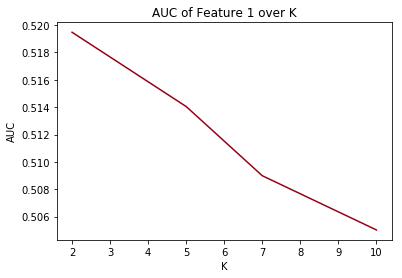

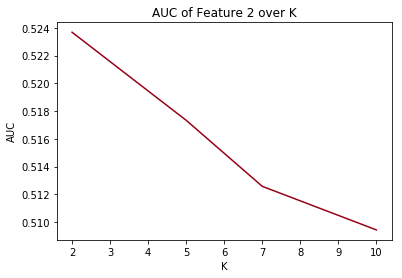

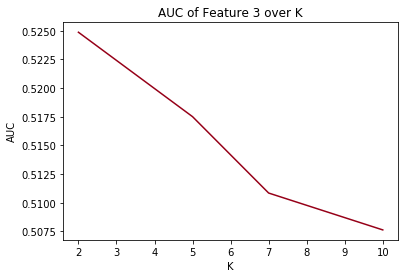

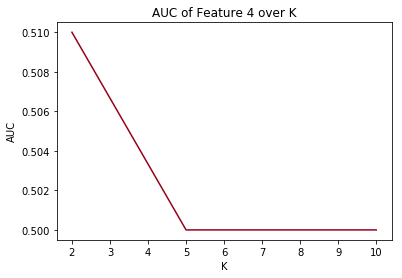

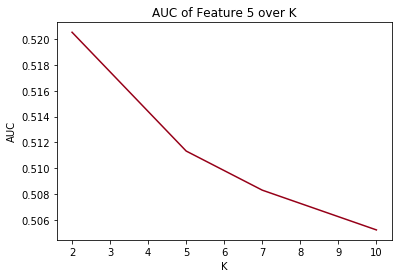

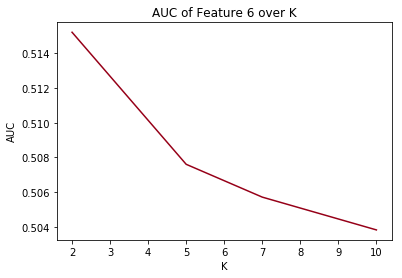

In [9]:
import matplotlib.pyplot as plt

Ks = [2, 5, 7, 10]
AUCs = [
    [0.519480, 0.514048, 0.508990, 0.505027],
    [0.523683, 0.517334, 0.512572, 0.509429],
    [0.524869, 0.517504, 0.510843, 0.507626],
    [0.510000, 0.500000, 0.500000, 0.500000],
    [0.520542, 0.511329, 0.508296, 0.505213],
    [0.515220, 0.507602, 0.505709, 0.503817]
]

for i in range(len(AUCs)):
    plt.figure()
    plt.title('AUC of Feature %d over K' % (i+1))
    plt.xlabel('K')
    plt.ylabel('AUC')
    plt.plot(Ks, AUCs[i], c='#960018')
    #plt.scatter(XB[YB>1,0], XB[YB>1,1], c='#003152')
    plt.show()